In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras import utils
from tensorflow.keras import losses
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 0
- Get the MNIST dataset from keras.
- Use the predefined split into training and test data.

In [5]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

- Reshape and scale your data.

In [20]:
def reshape_x(x: np.ndarray):
    shape = x.shape
    # Add one color channel
    return x.reshape(*shape, 1)

def reshape_y(y: np.ndarray):
    return np.array(list(map(lambda x: np.identity(10)[x], y)))

train_x_reshaped = reshape_x(train_x)
train_y_reshaped = reshape_y(train_y)

test_x_reshaped = reshape_x(test_x)
test_y_reshaped = reshape_y(test_y)

input_shape = (*train_x.shape[-2:], 1)
print(input_shape)

(28, 28, 1)


### Plot example

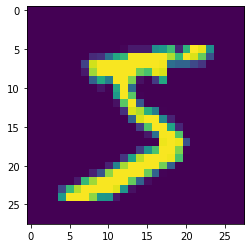

In [14]:
plt.imshow(train_x[0])
plt.show()

# Step 1
- Use a CNN* with two convolutional layers (32 and 64 filters, kernel size 3x3, same padding),one max pooling layer (pool size 2x2) and at least one dense layer to classify all digits from their images.
- Other parameters: RELU activations, categorical cross entropy, accuracy metric, the Adam optimizer, 12 epochs and a batch size of 32.
- Evaluate the NN on the test data.

In [21]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(train_x_reshaped, train_y_reshaped, batch_size=32, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.2842 - accuracy: 0.9556
Epoch 2/12
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0654 - accuracy: 0.9806
Epoch 3/12
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.0500 - accuracy: 0.9845
Epoch 4/12
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.0396 - accuracy: 0.9883
Epoch 5/12
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.0350 - accuracy: 0.9889
Epoch 6/12
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.0280 - accuracy: 0.9916
Epoch 7/12
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.0234 - accuracy: 0.9926
Epoch 8/12
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.0233 - accuracy: 0.9933
Epoch 9/12
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.0217 - accuracy: 0.9941
Epoch

In [24]:
model.save('trained_model.h5')

In [30]:
model = models.load_model('trained_model.h5')

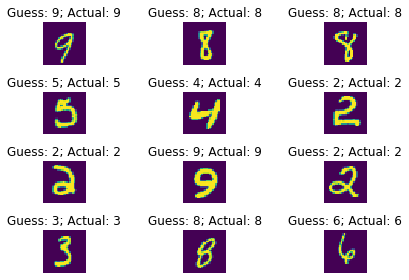

In [53]:
prediction = model.predict(test_x_reshaped)
rows = 4
cols = 3
for a in range(rows * cols):
    i = random.randrange(0, len(test_x))
    plt.subplot(rows, cols, a + 1)
    
    pred = max(enumerate(prediction[i]), key=lambda x: x[1])
    actual = test_y[i]
    plt.title(f'Guess: {pred[0]}; Actual: {actual}')
    plt.axis('off')
    plt.imshow(test_x[i])

plt.tight_layout()
plt.show()